In [28]:
from numpy import mean, std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [29]:
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
    return X, y

In [30]:
def get_models():
    models = dict()
    for i in range(2, 10):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
    return models

In [31]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [32]:
X, y = get_dataset()

In [33]:
models = get_models()

In [34]:
results, names = list(), list()

In [35]:
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>2 0.720 (0.042)
>3 0.821 (0.038)
>4 0.873 (0.032)
>5 0.893 (0.029)
>6 0.885 (0.026)
>7 0.888 (0.027)
>8 0.879 (0.026)
>9 0.883 (0.026)


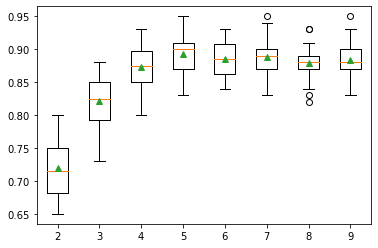

In [36]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()